In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data1 = pd.read_csv("C:/Users/ayana/Desktop/IDS project/CICIDS 2017 dataset/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv")
data2 = pd.read_csv("C:/Users/ayana/Desktop/IDS project/CICIDS 2017 dataset/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv")
data3 = pd.read_csv("C:/Users/ayana/Desktop/IDS project/CICIDS 2017 dataset/Friday-WorkingHours-Morning.pcap_ISCX.csv")
data4 = pd.read_csv("C:/Users/ayana/Desktop/IDS project/CICIDS 2017 dataset/Monday-WorkingHours.pcap_ISCX.csv")
data5 = pd.read_csv("C:/Users/ayana/Desktop/IDS project/CICIDS 2017 dataset/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv")
data6 = pd.read_csv("C:/Users/ayana/Desktop/IDS project/CICIDS 2017 dataset/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv")
data7 = pd.read_csv("C:/Users/ayana/Desktop/IDS project/CICIDS 2017 dataset/Tuesday-WorkingHours.pcap_ISCX.csv")
data8 = pd.read_csv("C:/Users/ayana/Desktop/IDS project/CICIDS 2017 dataset/Wednesday-workingHours.pcap_ISCX.csv")

In [5]:
data1.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [6]:
data1[' Label'].value_counts()

 Label
DDoS      128027
BENIGN     97718
Name: count, dtype: int64

In [7]:
datasets = [data1, data2, data3, data4, data5, data6, data7, data8]
for data in datasets:
    data.columns = data.columns.str.strip()

In [8]:
datasets = [data1, data2, data3, data4, data5, data6, data7, data8]
for i, data in enumerate(datasets, start=1):
    print(f"Les types d'attaques dans dataset {i} sont {data['Label'].unique()}")

Les types d'attaques dans dataset 1 sont ['BENIGN' 'DDoS']
Les types d'attaques dans dataset 2 sont ['BENIGN' 'PortScan']
Les types d'attaques dans dataset 3 sont ['BENIGN' 'Bot']
Les types d'attaques dans dataset 4 sont ['BENIGN']
Les types d'attaques dans dataset 5 sont ['BENIGN' 'Infiltration']
Les types d'attaques dans dataset 6 sont ['BENIGN' 'Web Attack � Brute Force' 'Web Attack � XSS'
 'Web Attack � Sql Injection']
Les types d'attaques dans dataset 7 sont ['BENIGN' 'FTP-Patator' 'SSH-Patator']
Les types d'attaques dans dataset 8 sont ['BENIGN' 'DoS slowloris' 'DoS Slowhttptest' 'DoS Hulk' 'DoS GoldenEye'
 'Heartbleed']


In [9]:
data6['Label'] = data6['Label'].replace({'\uFFFD': ''}, regex=True)  

In [10]:
data6['Label'].value_counts()

Label
BENIGN                       168186
Web Attack  Brute Force        1507
Web Attack  XSS                 652
Web Attack  Sql Injection        21
Name: count, dtype: int64

In [11]:
datasets = [data1, data2, data3 ,data5, data6, data7, data8]
data= pd.concat(datasets, ignore_index=True)
data = data.sample(frac=1, random_state=42).reset_index(drop=True) 
print(f"Taille du dataset combiné : {data.shape}")

Taille du dataset combiné : (2300825, 79)


In [ ]:
data.to_csv("C:/Users/ayana/Desktop/IDS project/Data/combined_data.csv",index= False)

In [15]:
data['Label'].value_counts()

Label
BENIGN                       1743179
DoS Hulk                      231073
PortScan                      158930
DDoS                          128027
DoS GoldenEye                  10293
FTP-Patator                     7938
SSH-Patator                     5897
DoS slowloris                   5796
DoS Slowhttptest                5499
Bot                             1966
Web Attack  Brute Force         1507
Web Attack  XSS                  652
Infiltration                      36
Web Attack  Sql Injection         21
Heartbleed                        11
Name: count, dtype: int64

In [16]:
data.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,80,115263515,16,14,519,802,435,0,32.437500,107.360433,...,20,43681.18182,65933.17582,242472,23464,9.978120e+06,59136.44165,10000000,9800583,BENIGN
1,443,117933384,16,13,1000,4595,377,0,62.500000,102.995146,...,32,222387.50000,204760.44620,367175,77600,5.870000e+07,43213.41672,58800000,58700000,BENIGN
2,1311,48,2,0,4,0,2,2,2.000000,0.000000,...,24,0.00000,0.00000,0,0,0.000000e+00,0.00000,0,0,BENIGN
3,80,219697,3,4,358,405,352,0,119.333333,201.517576,...,20,0.00000,0.00000,0,0,0.000000e+00,0.00000,0,0,BENIGN
4,53,169,2,2,60,264,30,30,30.000000,0.000000,...,20,0.00000,0.00000,0,0,0.000000e+00,0.00000,0,0,BENIGN


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2300825 entries, 0 to 2300824
Data columns (total 79 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Destination Port             int64  
 1   Flow Duration                int64  
 2   Total Fwd Packets            int64  
 3   Total Backward Packets       int64  
 4   Total Length of Fwd Packets  int64  
 5   Total Length of Bwd Packets  int64  
 6   Fwd Packet Length Max        int64  
 7   Fwd Packet Length Min        int64  
 8   Fwd Packet Length Mean       float64
 9   Fwd Packet Length Std        float64
 10  Bwd Packet Length Max        int64  
 11  Bwd Packet Length Min        int64  
 12  Bwd Packet Length Mean       float64
 13  Bwd Packet Length Std        float64
 14  Flow Bytes/s                 float64
 15  Flow Packets/s               float64
 16  Flow IAT Mean                float64
 17  Flow IAT Std                 float64
 18  Flow IAT Max                 int64  
 19  

In [18]:
data.describe()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,2.300825e+06,2.300825e+06,2.300825e+06,2.300825e+06,2.300825e+06,2.300825e+06,2.300825e+06,2.300825e+06,2.300825e+06,2.300825e+06,...,2.300825e+06,2.300825e+06,2.300825e+06,2.300825e+06,2.300825e+06,2.300825e+06,2.300825e+06,2.300825e+06,2.300825e+06,2.300825e+06
mean,7.478905e+03,1.579823e+07,9.124129e+00,1.013505e+01,5.531908e+02,1.576287e+04,2.114469e+02,1.835353e+01,5.991961e+01,7.154907e+01,...,4.958900e+00,-2.540647e+03,8.457227e+04,4.065386e+04,1.549771e+05,6.163359e+04,9.433560e+06,5.732621e+05,9.864630e+06,8.990073e+06
std,1.743643e+04,3.460566e+07,7.127588e+02,9.522747e+02,1.067420e+04,2.156969e+06,7.657296e+02,6.461895e+01,2.015989e+02,3.038008e+02,...,5.755252e+02,1.173879e+06,6.618916e+05,3.925080e+05,1.025175e+06,5.935032e+05,2.532916e+07,4.995685e+06,2.611131e+07,2.506222e+07
min,0.000000e+00,-1.300000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,-5.368707e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.300000e+01,1.470000e+02,1.000000e+00,1.000000e+00,6.000000e+00,2.000000e+00,6.000000e+00,0.000000e+00,6.000000e+00,0.000000e+00,...,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,8.000000e+01,3.132200e+04,2.000000e+00,2.000000e+00,6.000000e+01,1.200000e+02,3.600000e+01,2.000000e+00,3.300000e+01,0.000000e+00,...,1.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,4.430000e+02,4.582168e+06,5.000000e+00,4.000000e+00,1.870000e+02,5.680000e+02,8.100000e+01,3.500000e+01,4.928571e+01,2.327660e+01,...,2.000000e+00,3.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,6.553300e+04,1.200000e+08,2.079640e+05,2.846020e+05,1.290000e+07,6.270000e+08,2.482000e+04,2.325000e+03,5.940857e+03,7.049469e+03,...,1.986360e+05,1.380000e+02,1.100000e+08,7.420000e+07,1.100000e+08,1.100000e+08,1.200000e+08,7.690000e+07,1.200000e+08,1.200000e+08


In [19]:
data.duplicated().sum()

281095

In [20]:
data.drop_duplicates(inplace = True)
data.shape

(2019730, 79)

In [21]:
print(data.isnull().sum().sum())

302


In [22]:
print(data.isin([np.inf,-np.inf]).sum().sum())

2212


In [23]:
data.replace([np.inf,-np.inf],np.nan,inplace=True)

In [24]:
data.isnull().sum().sum()

2514

In [25]:
data.fillna(data.select_dtypes(include=['number']).mean(), inplace=True)

In [26]:
print(data.isnull().sum().sum())

0


In [27]:
data['Label'].value_counts()

Label
BENIGN                       1593852
DoS Hulk                      172849
DDoS                          128016
PortScan                       90819
DoS GoldenEye                  10286
FTP-Patator                     5933
DoS slowloris                   5385
DoS Slowhttptest                5228
SSH-Patator                     3219
Bot                             1953
Web Attack  Brute Force         1470
Web Attack  XSS                  652
Infiltration                      36
Web Attack  Sql Injection         21
Heartbleed                        11
Name: count, dtype: int64

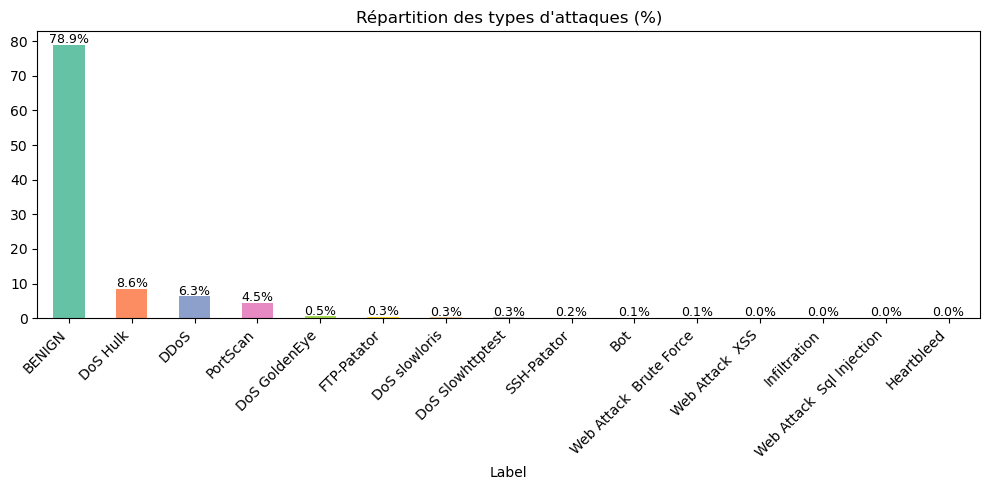

In [28]:
attack_percentages = data['Label'].value_counts(normalize=True) * 100
ax = attack_percentages.plot(kind='bar', figsize=(10, 5), color=plt.cm.Set2(range(len(attack_percentages))))
for i, v in enumerate(attack_percentages):
    ax.text(i, v + 0.5, f'{v:.1f}%', ha='center', fontsize=9)
plt.xticks(rotation=45, ha='right')
plt.title("Répartition des types d'attaques (%)")
plt.tight_layout()
plt.show()

In [22]:
df = data.groupby("Label", group_keys=False).apply(lambda x: x.sample(frac=0.25, random_state=42))
df.to_csv("echantillon.csv", index=False)

In [23]:
df.shape

(444880, 79)

In [24]:
df['Label'].value_counts()

Label
BENIGN              338419
DoS Hulk             43212
DDoS                 32004
PortScan             22705
DoS GoldenEye         2572
FTP-Patator           1483
DoS slowloris         1346
DoS Slowhttptest      1307
SSH-Patator            805
Web Attack             536
Bot                    488
Heartbleed               3
Name: count, dtype: int64

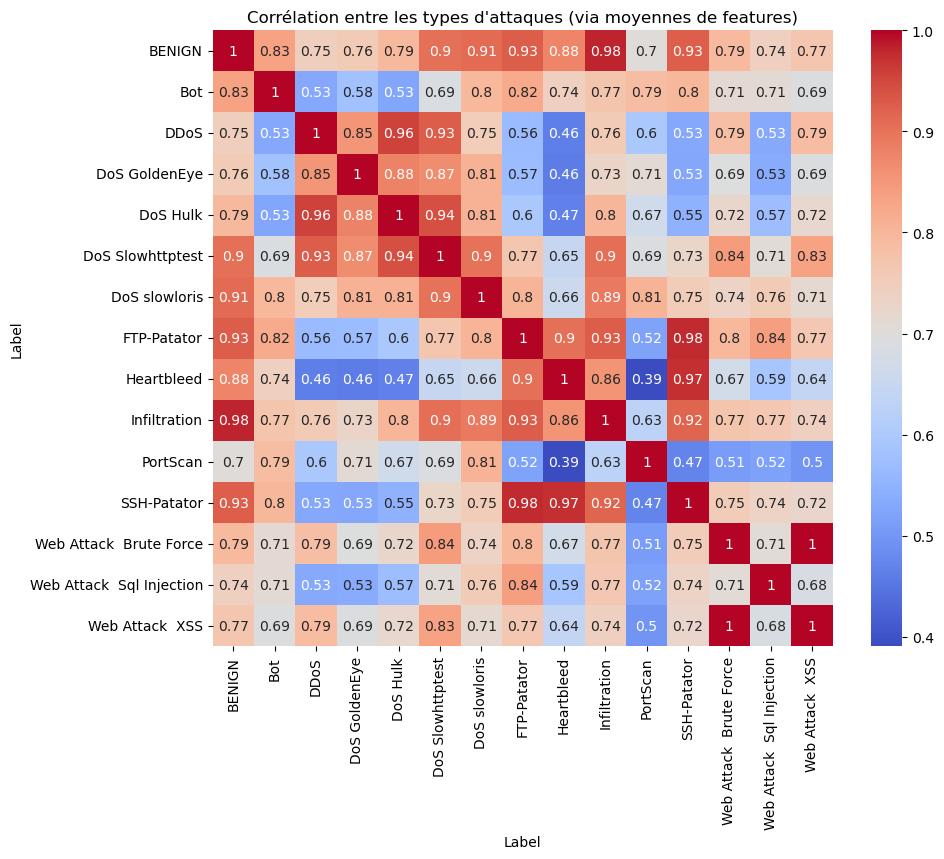

In [30]:
import pandas as pd

# Regrouper les données par label (attaque) et prendre la moyenne de chaque feature
attack_means = data.groupby('Label').mean()

# Calculer la matrice de corrélation entre les types d’attaques
corr_matrix = attack_means.T.corr()

# Afficher la corrélation entre les types d'attaque
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Corrélation entre les types d'attaques (via moyennes de features)")
plt.savefig("correlation_attacks_heatmap.png", dpi=300)
plt.show()


In [31]:
data["Label"] = data["Label"].replace({
    "Web Attack  Brute Force": "Attaques web",
    "Web Attack  XSS": "Attaques web",
    "Web Attack  Sql Injection": "Attaques web",
    "BENIGN": "BENIGN",
    "DDoS": "DoS",
    "DoS slowloris": "DoS",
    "DoS Slowhttptest": "DoS",
    "DoS Hulk": "DoS",
    "DoS GoldenEye": "DoS",
    "PortScan": "PortScan",
    "Infiltration": "Infiltration",
    "Bot": "Bot",
    "FTP-Patator": "Brute Force",
    "SSH-Patator": "Brute Force",
    "Heartbleed": "DoS"
})
print("\n Catégories après regroupement :", data["Label"].unique())


 Catégories après regroupement : ['BENIGN' 'DoS' 'PortScan' 'Attaques web' 'Brute Force' 'Bot'
 'Infiltration']


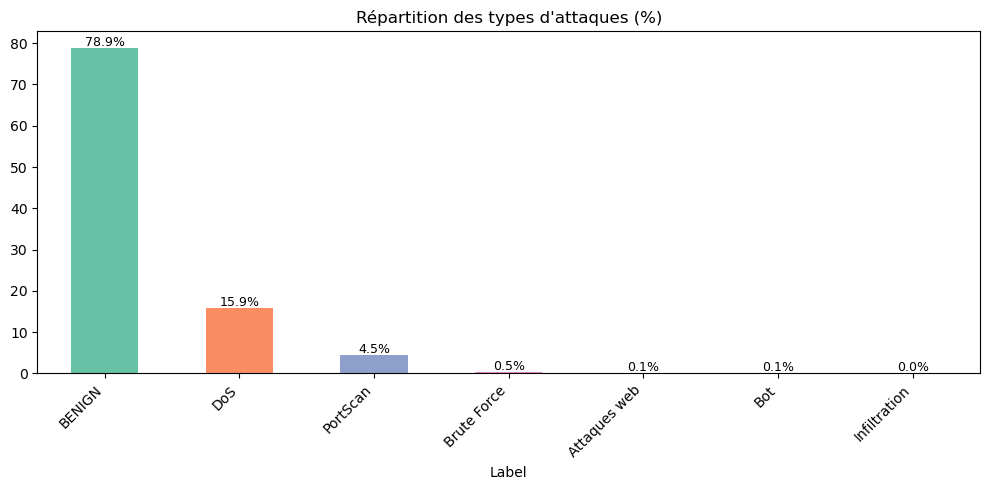

In [32]:
attack_percentages = data['Label'].value_counts(normalize=True) * 100
ax = attack_percentages.plot(kind='bar', figsize=(10, 5), color=plt.cm.Set2(range(len(attack_percentages))))
for i, v in enumerate(attack_percentages):
    ax.text(i, v + 0.5, f'{v:.1f}%', ha='center', fontsize=9)
plt.xticks(rotation=45, ha='right')
plt.title("Répartition des types d'attaques (%)")
plt.tight_layout()
plt.show()

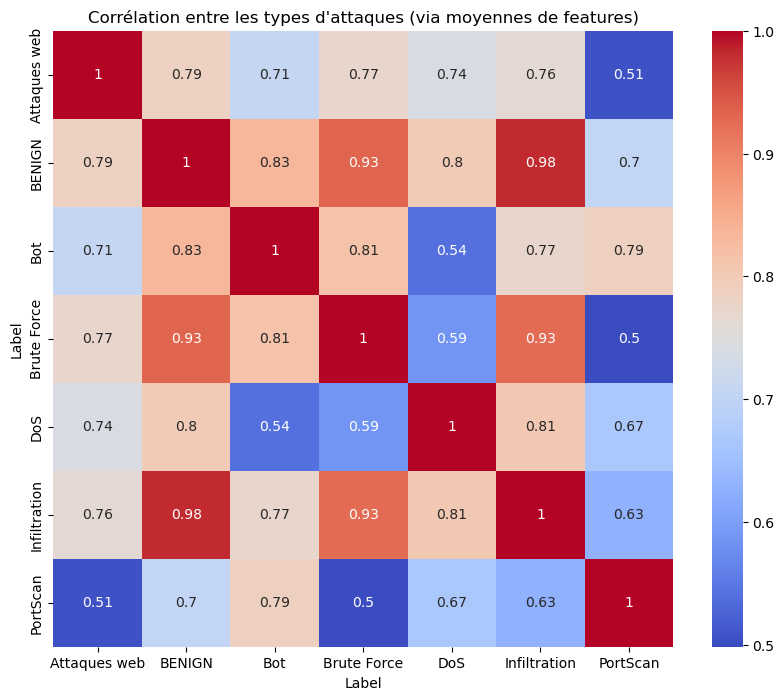

In [ ]:
attack_means = data.groupby('Label').mean()
corr_matrix = attack_means.T.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Corrélation entre les types d'attaques (via moyennes de features)")
plt.savefig("correlation_attacks_heatmap.png", dpi=300)
plt.show()

In [ ]:
data.to_csv("C:/Users/ayana/Desktop/IDS project/Data/categorie.csv",index= False)

In [ ]:
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
import pandas as pd

data = pd.read_csv("C:/Users/ayana/Desktop/IDS project/Data/categorie.csv")
X = data.drop(columns=['Label'])
y = data['Label']
df_full = pd.concat([X, y], axis=1)

target_count = 5000
class_counts = y.value_counts()

# Classes à suréchantillonner (SMOTE)
minority_classes = class_counts[class_counts < target_count].index
# Classes à sous-échantillonner
majority_classes = class_counts[class_counts > target_count].index
# Classes déjà équilibrées
balanced_classes = class_counts[class_counts == target_count].index

# SMOTE sur les classes minoritaires (toutes à la fois)
X_min = df_full[df_full['Label'].isin(minority_classes)].drop(columns=['Label'])
y_min = df_full[df_full['Label'].isin(minority_classes)]['Label']

smote_strategy = {cls: target_count for cls in minority_classes}
sm = SMOTE(sampling_strategy=smote_strategy, random_state=42)
X_sm, y_sm = sm.fit_resample(X_min, y_min)
df_smote = pd.concat([pd.DataFrame(X_sm, columns=X_min.columns), pd.Series(y_sm, name='Label')], axis=1)

# Sous-échantillonnage des classes majoritaires
dfs_majority = []
for cls in majority_classes:
    df_cls = df_full[df_full['Label'] == cls]
    df_resampled = resample(df_cls,
                            replace=False,
                            n_samples=target_count,
                            random_state=42)
    dfs_majority.append(df_resampled)

# Garder les classes déjà équilibrées
df_balanced = df_full[df_full['Label'].isin(balanced_classes)]
final_df = pd.concat([df_smote] + dfs_majority + [df_balanced]).sample(frac=1, random_state=42).reset_index(drop=True)
print(final_df['Label'].value_counts())


Label
BENIGN          5000
Attaques web    5000
Bot             5000
Infiltration    5000
PortScan        5000
DoS             5000
Brute Force     5000
Name: count, dtype: int64


In [ ]:
final_df.to_csv("C:/Users/ayana/Desktop/IDS project/Data/balanced_data.csv",index= False)

In [ ]:
data = pd.read_csv("C:/Users/ayana/Desktop/IDS project/Data/balanced_data.csv")

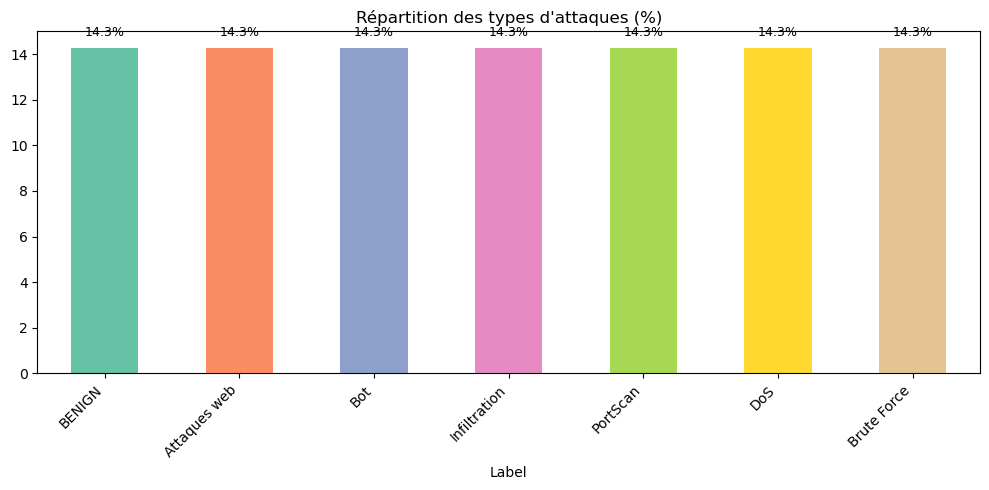

In [47]:
attack_percentages = data['Label'].value_counts(normalize=True) * 100
ax = attack_percentages.plot(kind='bar', figsize=(10, 5), color=plt.cm.Set2(range(len(attack_percentages))))
for i, v in enumerate(attack_percentages):
    ax.text(i, v + 0.5, f'{v:.1f}%', ha='center', fontsize=9)
plt.xticks(rotation=45, ha='right')
plt.title("Répartition des types d'attaques (%)")
plt.tight_layout()
plt.show()

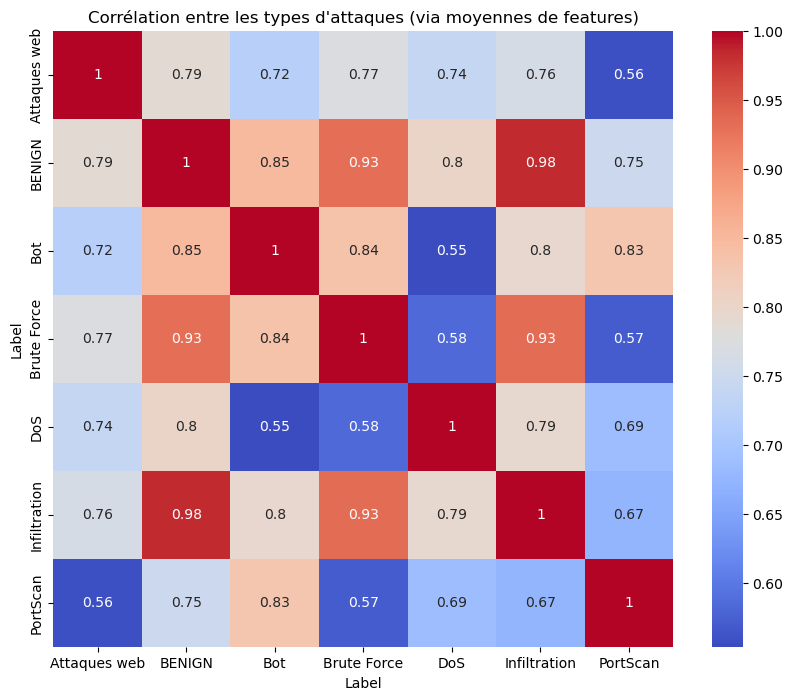

In [ ]:
attack_means = data.groupby('Label').mean()
corr_matrix = attack_means.T.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Corrélation entre les types d'attaques (via moyennes de features)")
plt.savefig("correlation_attacks_heatmap.png", dpi=300)
plt.show()

Colonne Flow Duration : 7424 outliers détectés


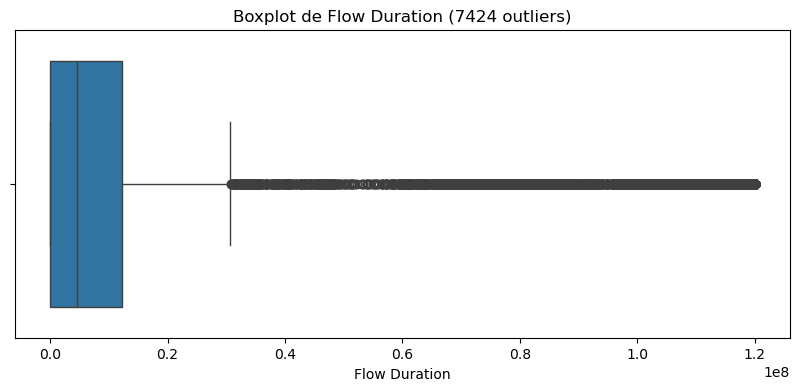

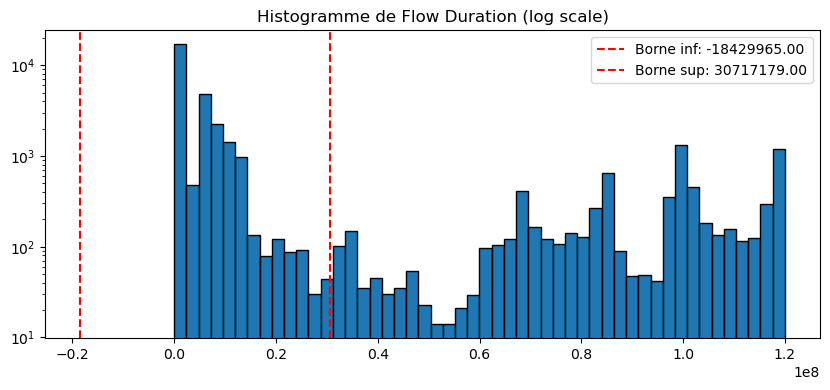

Colonne Total Fwd Packets : 5772 outliers détectés


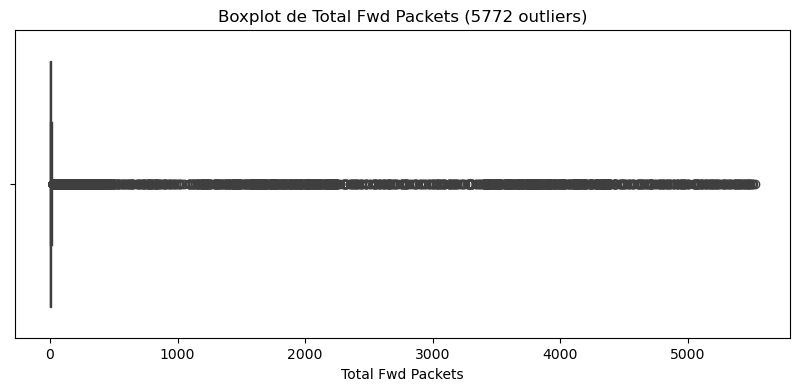

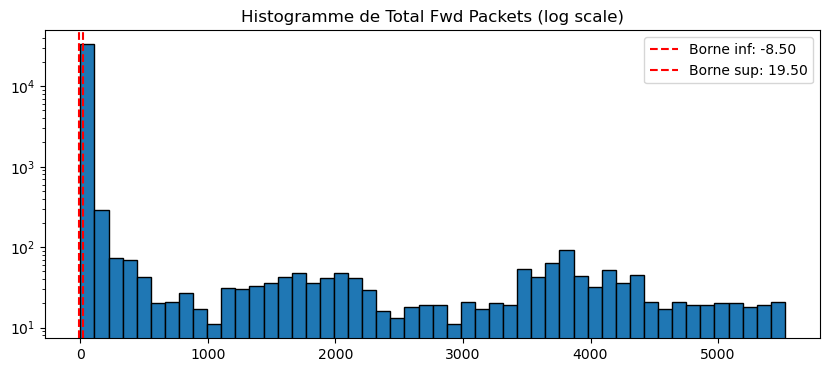

Colonne Flow Bytes/s : 5057 outliers détectés


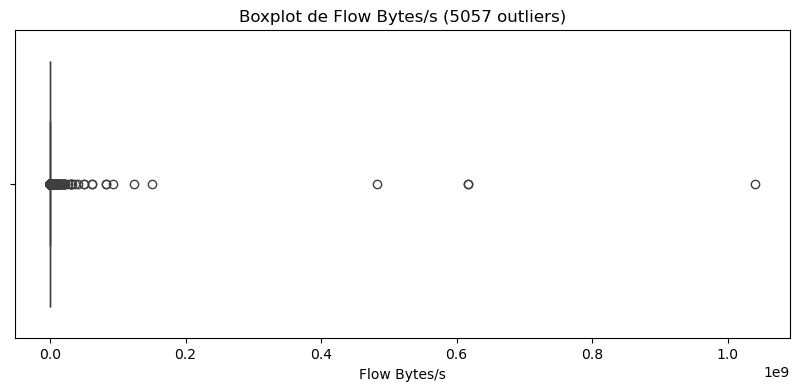

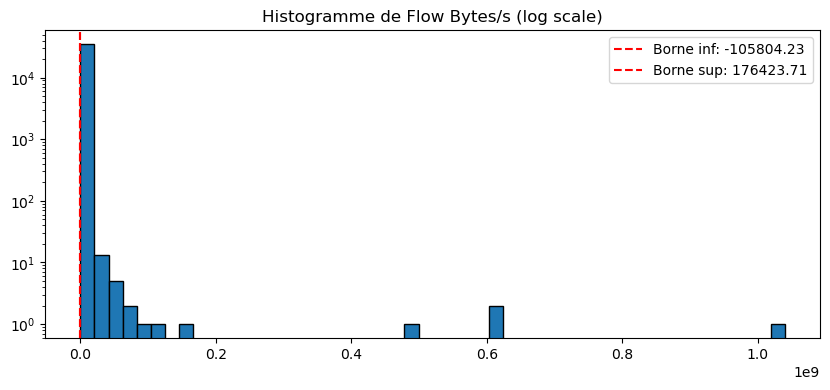

Colonne Bwd IAT Total : 5594 outliers détectés


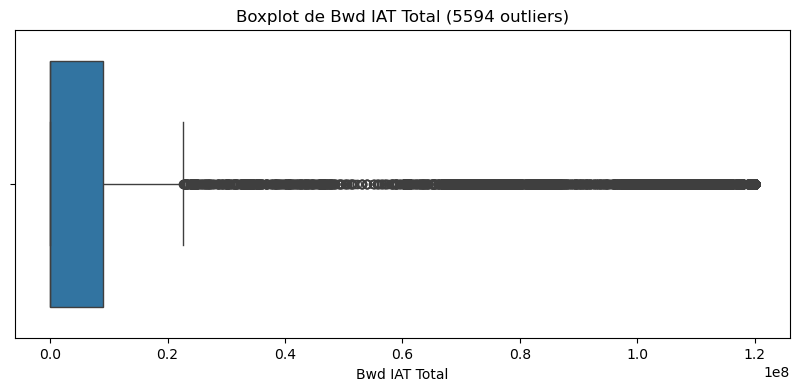

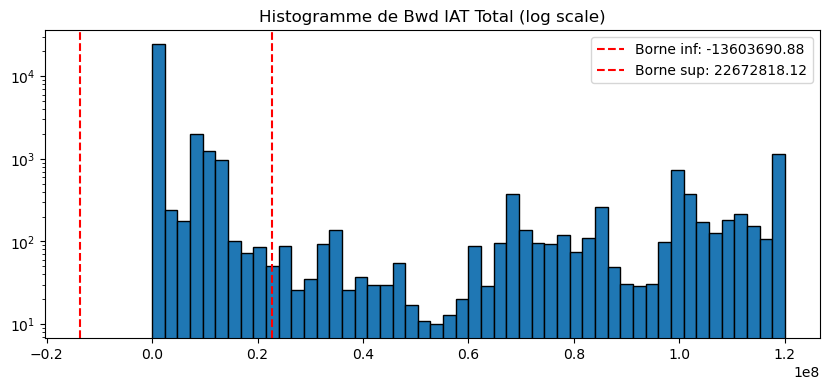

Colonne Active Mean : 8404 outliers détectés


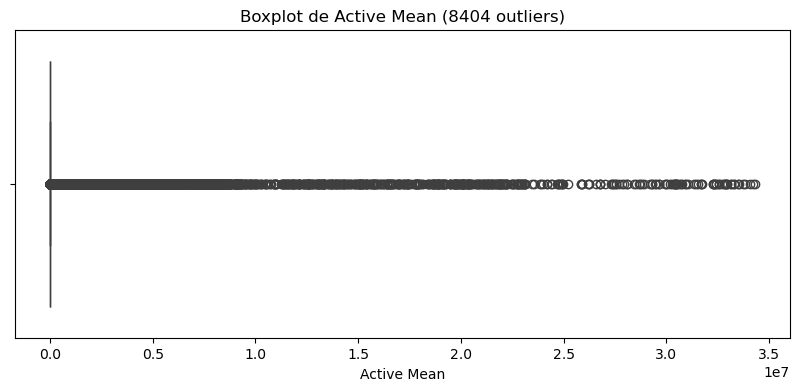

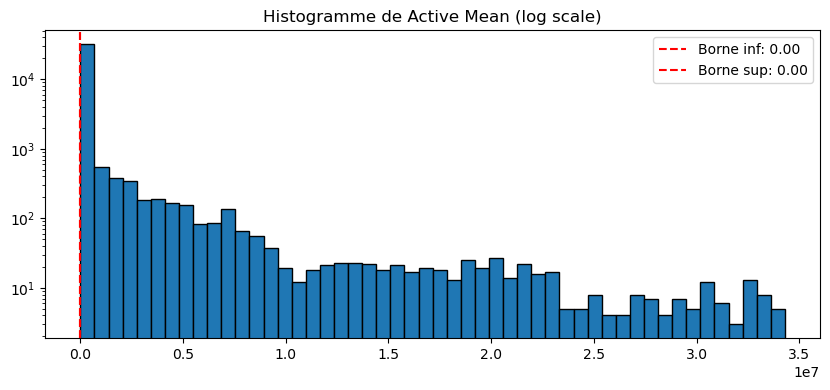

Colonne Destination Port : 7049 outliers détectés
Colonne Flow Duration : 7424 outliers détectés
Colonne Total Fwd Packets : 5772 outliers détectés
Colonne Total Backward Packets : 3905 outliers détectés
Colonne Total Length of Fwd Packets : 7291 outliers détectés
Colonne Total Length of Bwd Packets : 8092 outliers détectés
Colonne Fwd Packet Length Max : 4149 outliers détectés
Colonne Fwd Packet Length Min : 2207 outliers détectés
Colonne Fwd Packet Length Mean : 5136 outliers détectés
Colonne Fwd Packet Length Std : 2288 outliers détectés
Colonne Bwd Packet Length Max : 6825 outliers détectés
Colonne Bwd Packet Length Min : 2234 outliers détectés
Colonne Bwd Packet Length Mean : 5479 outliers détectés
Colonne Bwd Packet Length Std : 6810 outliers détectés
Colonne Flow Bytes/s : 5057 outliers détectés
Colonne Flow Packets/s : 4333 outliers détectés
Colonne Flow IAT Mean : 2977 outliers détectés
Colonne Flow IAT Std : 4740 outliers détectés
Colonne Flow IAT Max : 6385 outliers détectés

In [ ]:
numeric_columns = data.select_dtypes(include=[np.number]).columns
X = data[numeric_columns]

def detect_outliers(df, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)][column]
    print(f"Colonne {column} : {outliers.count()} outliers détectés")
    
    return outliers, lower_bound, upper_bound

# Visualiser les outliers pour quelques colonnes clés
columns_to_visualize = [
    'Flow Duration',         
    'Total Fwd Packets',     
    'Flow Bytes/s',          
    'Bwd IAT Total',         
    'Active Mean'            
]

for col in columns_to_visualize:
    outliers, lower_bound, upper_bound = detect_outliers(X, col)
    
    # Boxplot
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=X[col])
    plt.title(f"Boxplot de {col} ({outliers.count()} outliers)")
    plt.xlabel(col)
    plt.show()
    
    # Histogramme
    plt.figure(figsize=(10, 4))
    plt.hist(X[col], bins=50, edgecolor='black', log=True)  # Échelle log pour mieux voir les extrêmes
    plt.axvline(lower_bound, color='r', linestyle='--', label=f'Borne inf: {lower_bound:.2f}')
    plt.axvline(upper_bound, color='r', linestyle='--', label=f'Borne sup: {upper_bound:.2f}')
    plt.title(f"Histogramme de {col} (log scale)")
    plt.legend()
    plt.show()

outlier_counts = {col: detect_outliers(X, col)[0].count() for col in numeric_columns}
print("\nRésumé des outliers par colonne :")
for col, count in outlier_counts.items():
    print(f"{col}: {count} outliers")